## Завдання на практичну роботу "Основи TensorFlow та Deep Learning":

Завдання:
# #1
Вивчіть основні концепції TensorFlow, такі як тензори, операції та графи обчислень.
Створіть тензори різних типів та виконайте над ними операції.

# #2
### Побудова моделі для регресії:

використайте згенерований у лабораторній роботі 2 набір даних для задачі регресії, включаючи ознаки та відповідні значення цільової змінної.
Створіть та скомпілюйте модель нейронної мережі для регресії з використанням TensorFlow.
Виберіть функцію втрати та оптимізатор для моделі та навчіть її на підготовленому наборі даних.
Оцініть результати навчання та відобразіть їх графічно.
Порівняйте з результатами, отриманими у лабораторній роботі 2.

# #3
### Побудова моделі для класифікації:

використайте згенерований у ллабораторній роботіаб 3 набір даних для задачі бінарної класифікації, включаючи ознаки та мітки класів.
Створіть та скомпілюйте модель нейронної мережі для класифікації з використанням TensorFlow.
Виберіть функцію втрати, оптимізатор та метрики для моделі та навчіть її на підготовленому наборі даних.
Оцініть результати навчання та відобразіть їх графічно.
Порівняйте з результатами, отриманими у лабораторній роботі 3.
Підготовка звіту:

Підготуйте звіт, у форматі .ipynb з коментарями.
Завантаження роботи на GitHub:

Створіть відповідну папку у репозиторій на GitHub практичної роботи.
Розмістіть у папці всі необхідні файли, включаючи Jupyter Notebook та файли з даними.

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression, make_classification
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1
scalar = tf.constant(5)
vector = tf.constant([1, 2, 3])
matrix = tf.constant([[1, 2], [3, 4]])
tensor = tf.constant([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

a = tf.constant(5)
b = tf.constant(2)
# Виконання операцій
c = tf.add(a, b)
d = tf.multiply(a, b)

print(c)
print(d)


tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)


Epoch 1/10
25/25 [==============================] - 1s 8ms/step - loss: 4283.1235 - val_loss: 3641.3865
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 4207.3350 - val_loss: 3552.6543
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 4064.1147 - val_loss: 3379.9724
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 3795.2781 - val_loss: 3071.7812
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 3360.8169 - val_loss: 2586.3721
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 2708.1213 - val_loss: 1936.4442
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 1912.3231 - val_loss: 1199.1605
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 1102.2909 - val_loss: 593.5980
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 522.5745 - val_loss: 236.5540
Epoch 10/10
7/7 [==============================] - 0s 1ms/step
Сере

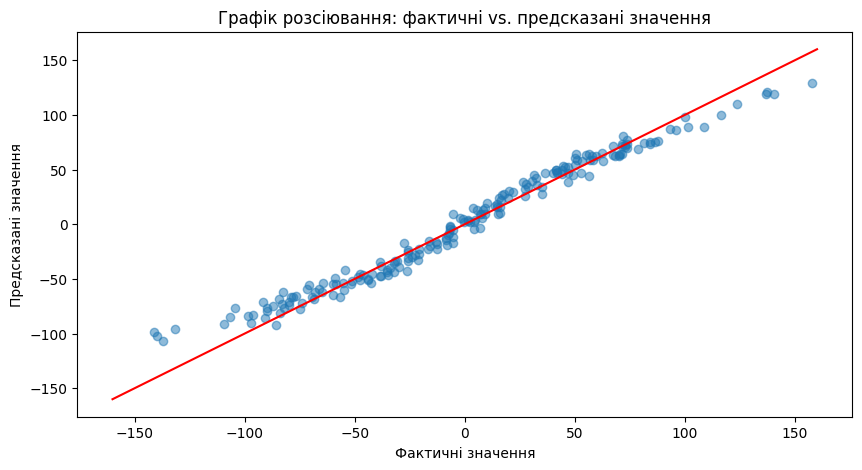

In [25]:
# 2
# Згенеруйте дані
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Визначення кількості ознак
num_features = X.shape[1]

# Створення моделі
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Один нейрон без активації для регресії
])

# Компіляція моделі
model.compile(optimizer='adam', loss='mean_squared_error')

# Навчання моделі
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Оцінка результатів
loss = model.evaluate(X_test, y_test)

# Прогнозування
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Середньоабсолютна помилка(MAE):", mae)
print("Середньоквадратична помилка(MSE):", mse)

# Візуалізація предсказаних та тестових даних
plt.figure(figsize=(10,5))
x = np.linspace(-160, 160)
plt.plot(x, x, label='y = x', color = "red")
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Фактичні значення')
plt.ylabel('Предсказані значення')
plt.title('Графік розсіювання: фактичні vs. предсказані значення')
plt.show()

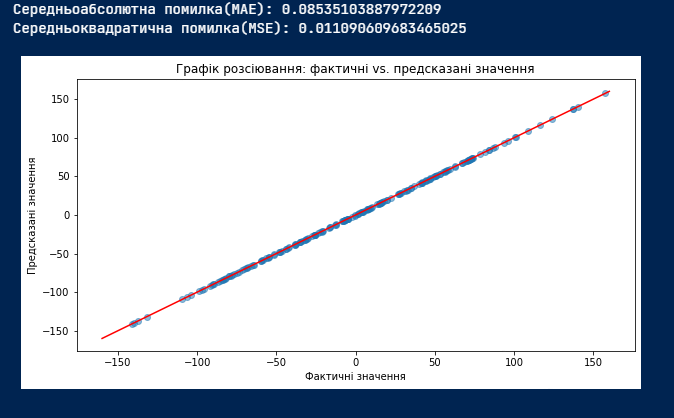

Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 0.6304 - accuracy: 0.6620
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.8660
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.8830
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8920
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.9000
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.9040
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.9010
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2794 - accuracy: 0.8980
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.2675 - accuracy: 0.9010
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.2530 - accuracy: 0.9010
Loss: 0.25301018357

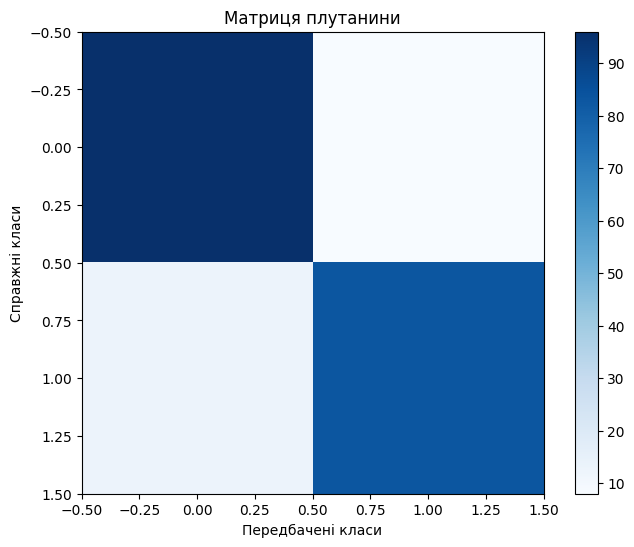

In [38]:
# 3
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Навчання моделі
model.fit(X, y, epochs=10, batch_size=32)

y_pred_non_binary = model.predict(X_test)

y_pred = (y_pred > 0.5).astype(int)

# Оцінка результатів навчання
loss, accuracy = model.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# метрики
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Виведемо метрики
print(f'Точність: {accuracy}')
print(f'Відгук: {recall}')
print(f'F1-середнє: {f1}')
print(f'AUC-ROC: {roc_auc}')
print(f'Матриця плутанини:\n{confusion}')

# Матриця плутанини
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Матриця плутанини')
plt.ylabel('Справжні класи')
plt.xlabel('Передбачені класи')
plt.show()


Точність: 0.9
Відгук: 0.8645833333333334
F1-середнє: 0.89247311827957
AUC-ROC: 0.8986378205128206
Матриця плутанини:
[[97  7]
 [13 83]]
 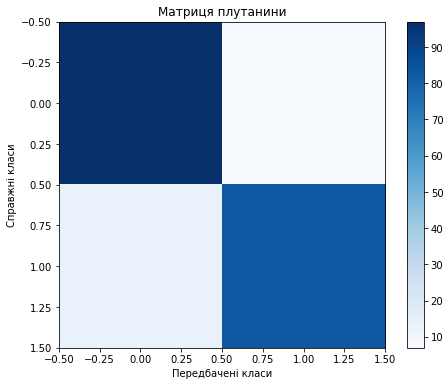